# Investigating the loss kink while training diffusion U-Net

> Why does the loss hover around 1?

In [1]:
#| default_exp diffusion_unet_investigation

In [2]:
# |export
from torch import nn

from slowai.activations import StoreModuleStatsCB
from slowai.cos_revisited import aesthetics
from slowai.ddpm import get_dls as get_fashion_dls
from slowai.diffusion_unet import TUnet, train
from slowai.learner import Callback
from slowai.super_rez import KaimingMixin

In [3]:
aesthetics()

In [4]:
dls = get_fashion_dls(bs=512)

loss,epoch,train
0.121,0,train
0.074,0,eval
0.044,1,train
0.040,1,eval


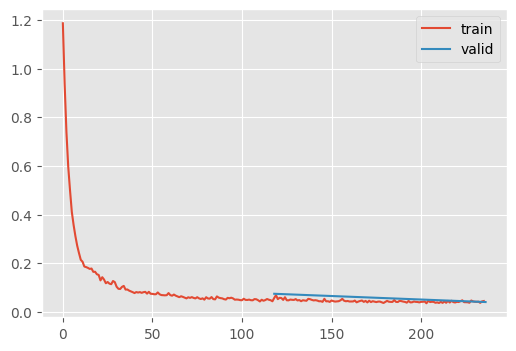

CPU times: user 19min 6s, sys: 4min 29s, total: 23min 35s
Wall time: 6min 56s


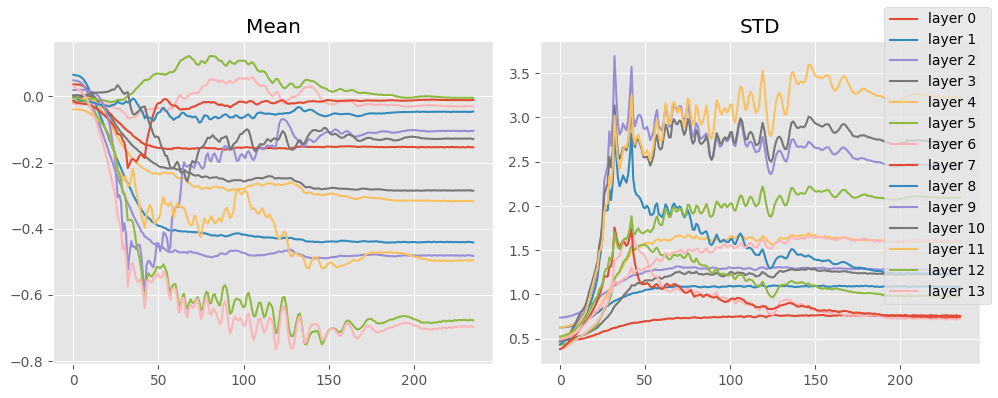

In [5]:
%%time
m = TUnet(
    color_channels=1,
    nfs=(32, 64, 128, 256, 384),
    n_blocks=(3, 2, 1, 1, 1, 1),
)
blocks = [*m.downblocks, *m.upblocks]
stats = StoreModuleStatsCB(
    sum([b.convs for b in blocks], nn.ModuleList()),
    hook_kwargs={"periodicity": 1},
)
train(
    m,
    dls,
    lr=4e-3,
    n_epochs=2,
    extra_cbs=[stats],
)
stats.mean_std_plot()

In [ ]:
del m

In [6]:
class KTUnet(TUnet, KaimingMixin):
    ...

In [ ]:
%%time
m = KTUnet.kaiming(
    color_channels=1,
    nfs=(32, 64, 128, 256, 384),
    n_blocks=(3, 2, 1, 1, 1, 1),
)
blocks = [*m.downblocks, *m.upblocks]
stats = StoreModuleStatsCB(
    sum([b.convs for b in blocks], nn.ModuleList()),
    hook_kwargs={"periodicity": 1},
)
train(
    m,
    dls,
    lr=1e-3,
    n_epochs=2,
    extra_cbs=[stats],
)
stats.mean_std_plot()

In [ ]:
#| hide
import nbdev

nbdev.nbdev_export()